# Task 1 – Dimensionality reduction
a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter
plot. Note that the scatter plot will show the observation number versus the observed value (as
we have a single feature to represent the instance).

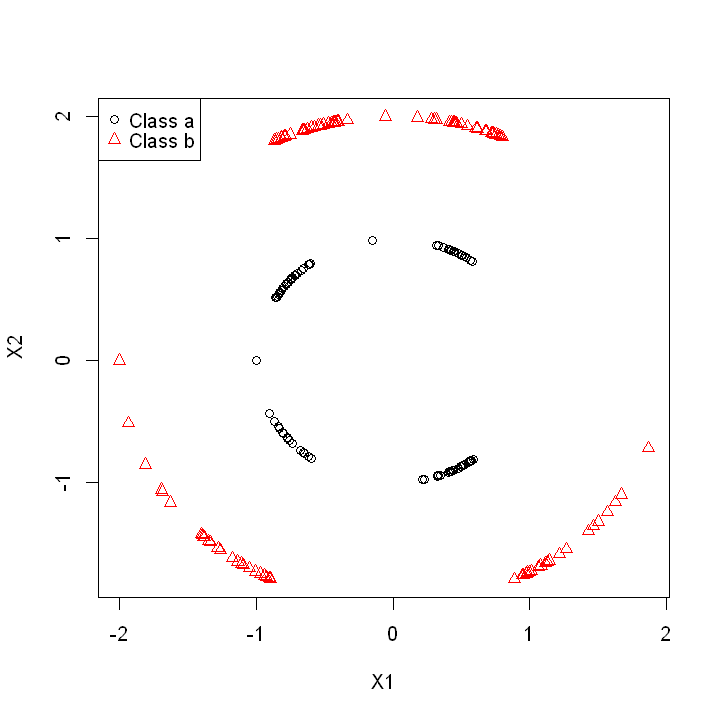

In [73]:
dat <- read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev <- as.numeric(dat[,3])
options(repr.plot.width=6, repr.plot.height=6) # to adjust plot size
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

In [13]:
dat_numeric <- dat[,-3]
head(dat_numeric)
pca<-princomp(dat_numeric)
summary(pca, loadings = TRUE)

X1,X2
0.5694828,0.8220033
0.4114692,0.9114237
0.4173846,-0.9087299
-0.7918276,0.6107447
-0.8067767,-0.5908565
-0.7154271,0.6986874


Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.3348613 0.8335936
Proportion of Variance 0.7194375 0.2805625
Cumulative Proportion  0.7194375 1.0000000

Loadings:
   Comp.1 Comp.2
X1         1.000
X2  1.000       

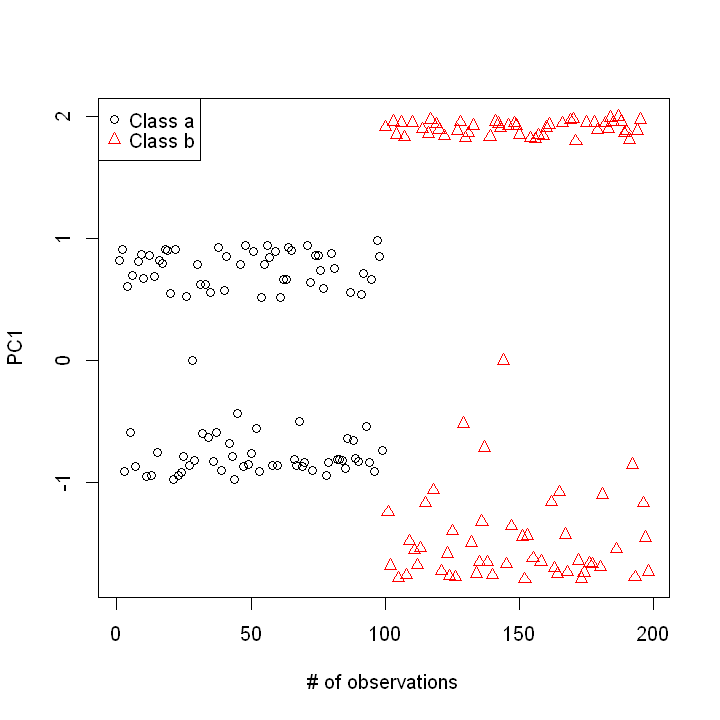

In [74]:
df_pc1 <- data.frame(pc1 = pca$loadings[1]*dat_numeric$X1 +pca$loadings[2]*dat_numeric$X2)
df_pc1$class <- dat[,3]
plot(1:dim(df_pc1)[1],df_pc1$pc1,col=as.numeric(df_pc1$class),pch=as.numeric(df_pc1$class),xlab = "# of observations",
     ylab = "PC1")
legend("topleft",paste("Class",levels(dat$class)),col=unique(dat$class), pch= unique(dat$class))

b)Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter
plot as in part (a). Use at least two different similarity measure.

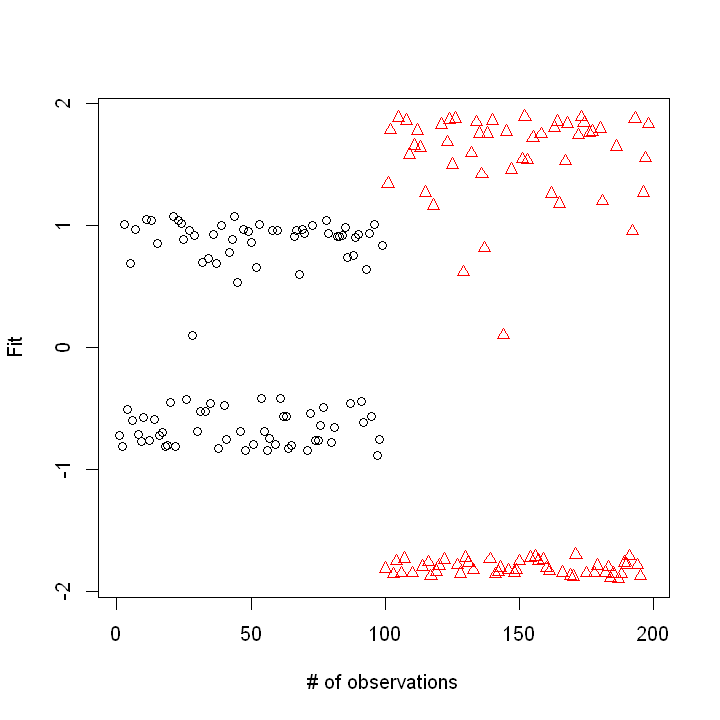

In [75]:
# Euclidian Distance as Similarity Measure
d1 <- dist(dat_numeric, method = "euclidian" ) # euclidean distances between the rows
fit1 <- cmdscale(d1, k=1) # k is the number of dim
df_msd1 <- data.frame(fit = fit1, class = dat[,3] )
plot(1:length(fit1),df_msd1$fit,col=as.numeric(df_msd1$class),pch=as.numeric(df_msd1$class), xlab = "# of observations",
     ylab = "Fit")

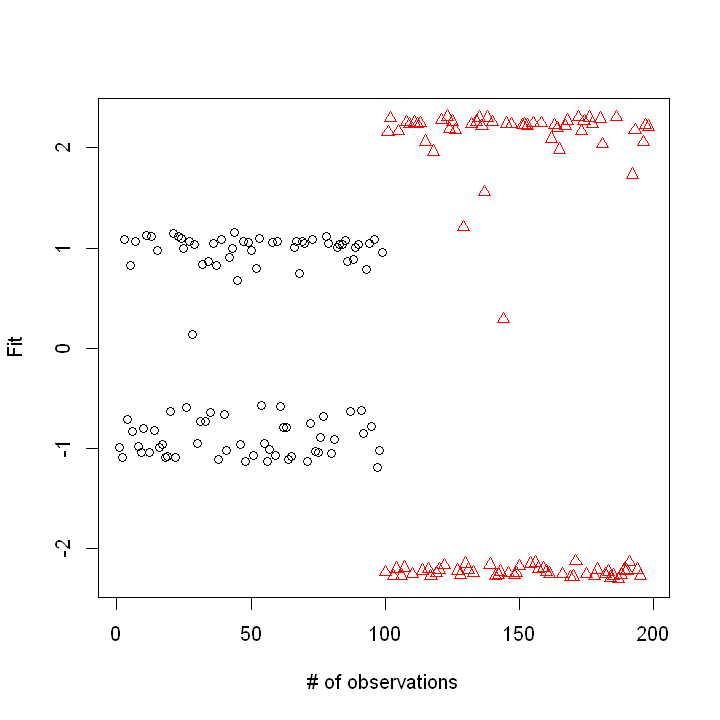

In [76]:
# Manhattan Distance as Similarity Measure
d2 <- dist(dat_numeric, method = "manhattan") # euclidean distances between the rows
fit2 <- cmdscale(d2, k=1) # k is the number of dim
df_msd2 <- data.frame(fit = fit2, class = dat[,3] )
plot(1:length(fit2),df_msd2$fit,col=as.numeric(df_msd2$class),pch=as.numeric(df_msd2$class), xlab = "# of observations",
     ylab = "Fit")

c) On a 2D scatter plot, one can observe how two observations from two classes are different.
1. What is your conclusion when you use PCA results in single dimension (your results
from part a)?
2. What is your conclusion when you use MDS results in single dimension (your results
from part b)? Compare the results from different similarity measures used in part (b)
3. Compare MDS results with PCA. What is your conclusion?

1. Covariance between X1 and X2 is almost zero. So eigen vectors are found as (0,1) and (1,0). Observations look like as they
are projected on the y axis. 
2. MDS with manhattan similarity measure do better work than mds with euclidian similarity measure in terms of keeping the
cluster information.
3. MDS gives better results than PCA, because MDS can be defined as nonlinear PCA. MDS keep cluster information better.

d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). Add the
following columns to your data, X1^2 , X2^2 , X1×X2 (three columns as functions of your
original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues?
What do they refer to?).

In [16]:
dat_new <- dat[,-3]
dat_new$X1sq <- (dat_new$X1)^2
dat_new$X2sq <- (dat_new$X2)^2
dat_new$X1X2 <- (dat_new$X1)*(dat_new$X2)
head(dat_new)

X1,X2,X1sq,X2sq,X1X2
0.5694828,0.8220033,0.3243106,0.6756894,0.4681167
0.4114692,0.9114237,0.1693069,0.8306931,0.3750228
0.4173846,-0.9087299,0.1742099,0.8257901,-0.3792899
-0.7918276,0.6107447,0.6269909,0.3730091,-0.4836045
-0.8067767,-0.5908565,0.6508886,0.3491114,0.4766892
-0.7154271,0.6986874,0.5118360,0.4881640,-0.4998599


In [17]:
pca_new<-princomp(dat_new)
summary(pca_new, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.574257 1.1980320 1.1320670 0.73677849 0.55195427
Proportion of Variance 0.410133 0.2375255 0.2120888 0.08983536 0.05041731
Cumulative Proportion  0.410133 0.6476585 0.8597473 0.94958269 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1           0.423  0.219  0.732  0.480
X2    0.713        -0.609 -0.139  0.310
X1sq -0.192 -0.153  0.271 -0.491  0.790
X2sq  0.666 -0.272  0.680        -0.140
X1X2        -0.847 -0.211  0.450  0.169

In [18]:
#Eigen values are variance explained by a component.
#Eigen vectors are columns below the components. (Comp.1, Comp.2 etc.) They indicates the relationship between principal 
#components and old features.
#I would use 4 components because they explain 92% of variance of the original data.
(pca_new$sdev)^2 #Eigen values

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
2.4782851 1.4352807 1.2815757 0.5428425 0.3046535

# Task 2 – Reconstructing Turkey Map
Please download the intercity distance information from Karayolları Genel Müdürlüğü’s website.
Suppose we apply MDS to this data to distance matrix to obtain latent variables in 2D dimensional
space. Represent the new feature space on a 2D plot. You are expected to label each data point with the
respective city’s name. This plot should be similar to Turkey map. Are there any unusual observations?
If yes, comment on your findings.

In [272]:
install.packages("readxl")
library("readxl")
install.packages("ggplot2")
library("ggplot2")


Warning message:
"package 'readxl' is in use and will not be installed"also installing the dependencies 'isoband', 'rlang'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
rlang   0.4.11 0.4.12              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\BURAK CAN HELVACI\Anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\BURAK CAN HELVACI\Anaconda3\envs\r-tutorial\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\BURAK CAN HELVACI\AppData\Local\Temp\RtmpAjY4P8\downloaded_packages


installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [274]:
mat <- read_excel("ilmesafe.xls", sheet = "Sayfa1", range = "A3:CE84" )
dist_mat <- mat[,c(-1,-2)] #plaka sutunu atıldı.
city_names <- mat[,2]
dist_mat[is.na(dist_mat)] <- 0 #Na değerleri 0 a çevrildi.
#dist_mat[lower.tri(dist_mat)] = t(dist_mat)[lower.tri(dist_mat)] # matris simetrik olacak şekilde değiştirildi.
head(dist_mat)

ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
0,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
335,0,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
575,910,0,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
966,648,1318,0,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
603,632,597,736,0,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
492,742,256,1054,333,0,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


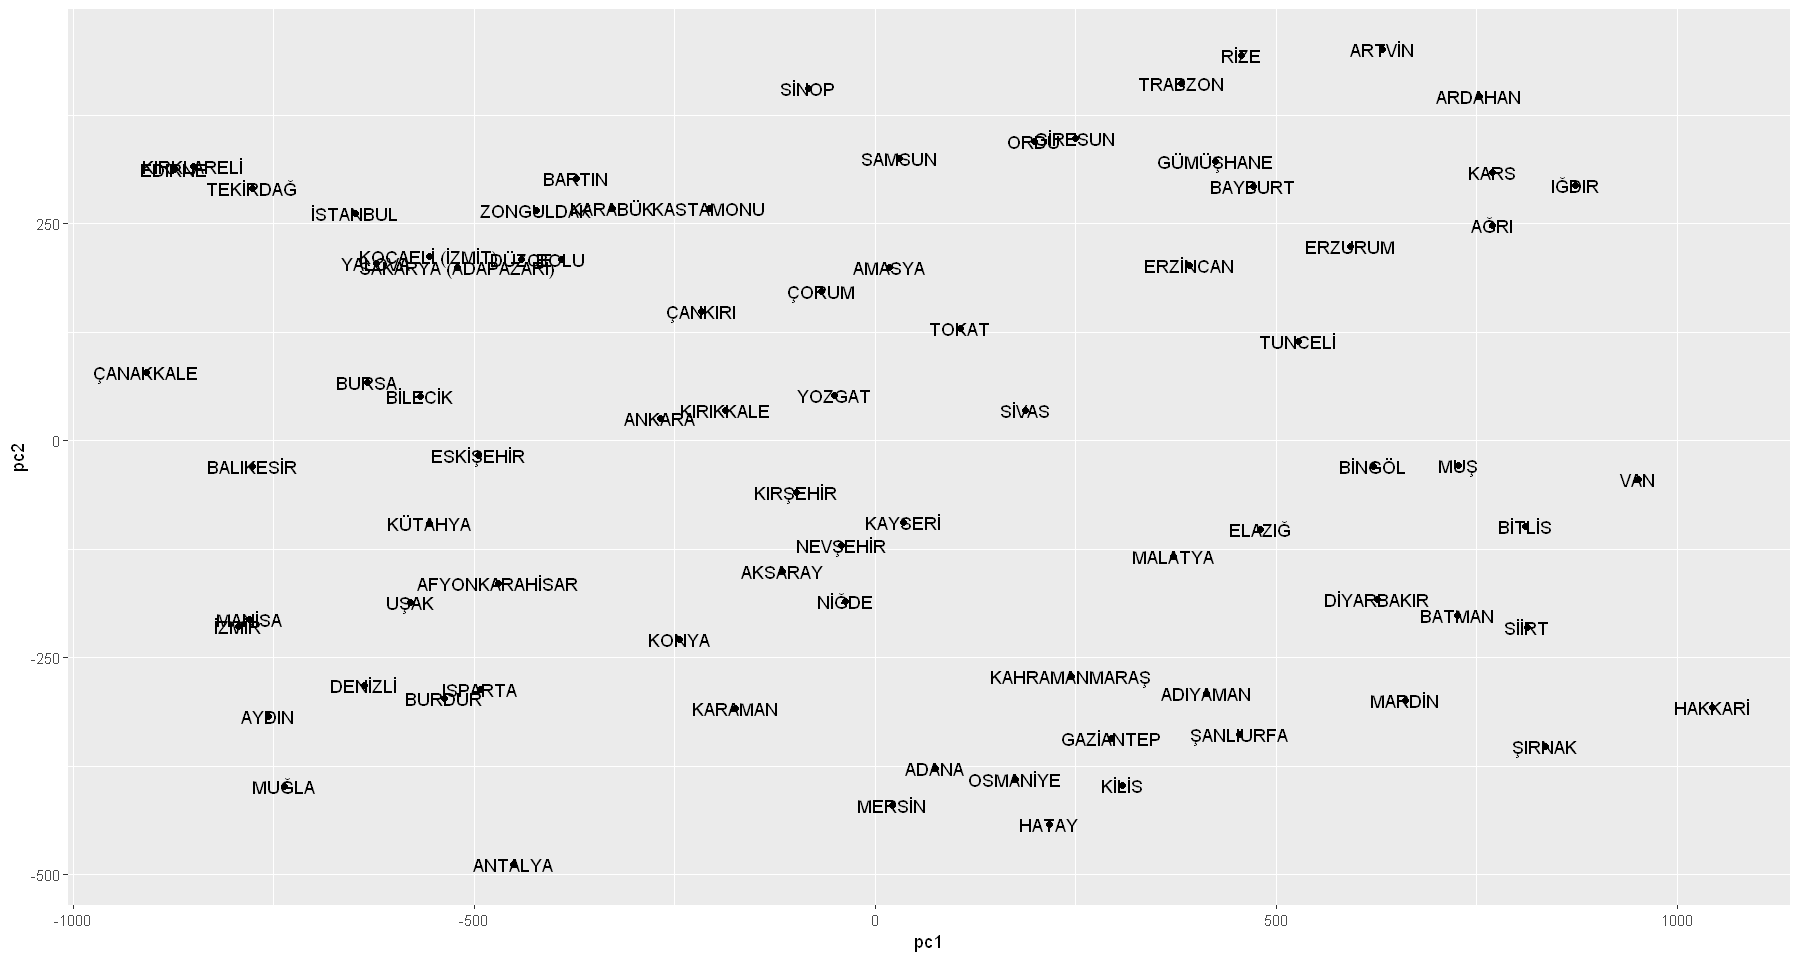

In [328]:
mds <- cmdscale(dist_mat, k=2)
mds_df <- data.frame(names = city_names$'İL ADI',pc1 = mds[,1], pc2 = mds[,2])
ggplot(mds_df, aes(pc1,pc2)) + geom_point() + geom_text(aes(label=names))
options(repr.plot.width=15, repr.plot.height=8)
#Map looks exactly like Turkey map.

# Task 3 – Dimensionality reduction for time series data
a) Read the data and visualize one instance (all axes) from each class and try to relate the shape (time
series) you see with the gestures shown in Figure 1 (this is just for fun, sometimes it is good to start
with data visualization to understand what is going on). A 3D scatter plot would be interesting. Note
that this is an acceleration information. You can transform this information to a velocity vector by
computing the cumulative sum of acceleration over time. A cumulative sum operation on the velocity
values will transform the series to a position information.

In [23]:
# X Train
x_tr = read.table("uWaveGestureLibrary_X_TRAIN")
colnames(x_tr)[1] = "class"
head(x_tr,5)

# y Train
y_tr = read.table("uWaveGestureLibrary_y_TRAIN")
colnames(y_tr)[1] = "class"
head(y_tr,5)

# z Train
z_tr = read.table("uWaveGestureLibrary_z_TRAIN")
colnames(z_tr)[1] = "class"
head(z_tr,5)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250


class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,-2.1193958,...,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335,0.08412335
5,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,0.6666239,...,-1.51726140,-1.55496780,-1.59267430,-1.62987010,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390,-1.66252390
5,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,-0.1897302,...,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970,-1.49248970
3,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,0.3740667,...,-1.53169760,-1.63940370,-1.74784270,-1.83756330,-1.90157430,-1.93363630,-1.91732350,-1.66037750,-1.37490280,-1.08942800
4,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,-0.3974369,...,-2.18080690,-2.22243160,-2.24174530,-2.24174530,-2.24174530,-2.22951440,-2.18521200,-2.12721040,-2.06920870,-2.01120700


class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725


In [30]:
#installing required packages
install.packages("plot3D")
library("plot3D")


  There is a binary version available but the source version is later:
       binary source needs_compilation
plot3D    1.3    1.4             FALSE



installing the source package 'plot3D'



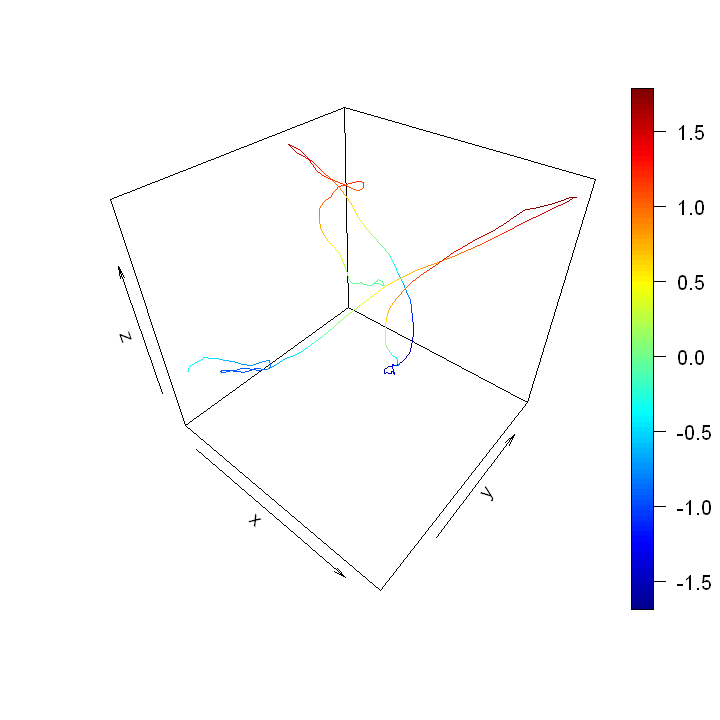

In [77]:
#Class 1 visualization
x1 <- x_tr[11,]
y1 <- y_tr[11,]
z1 <- z_tr[11,]
x1 <- x1[,-1]
y1 <- y1[,-1]
z1 <- z1[,-1]
concat_gest1 <- cbind(t(x1), t(y1), t(z1))
concat_gest1 <- data.frame(concat_gest1)
colnames(concat_gest1) <- c("X","Y","Z")
scatter3D(concat_gest1$X,concat_gest1$Y, concat_gest1$Z, type = "l")

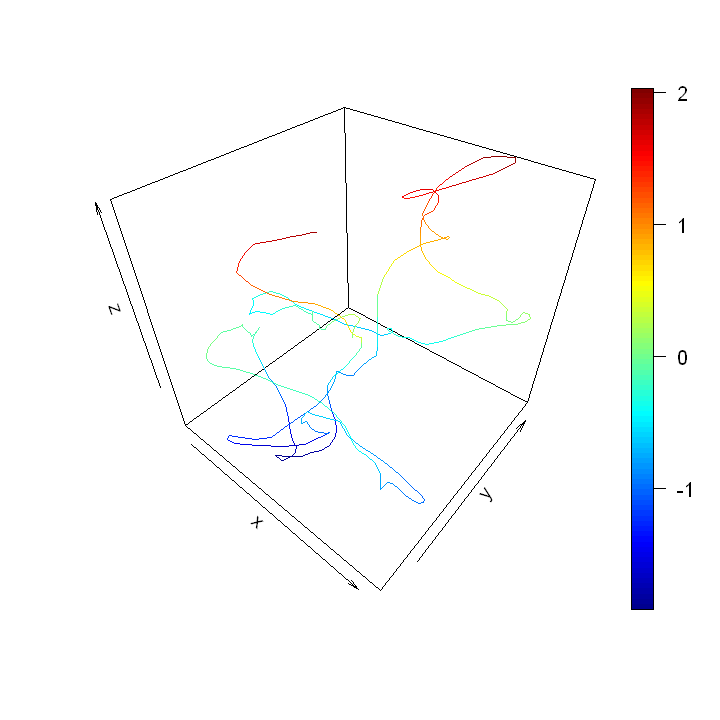

In [78]:
#Class 2 visualization
x2 <- x_tr[20,]
y2 <- y_tr[20,]
z2 <- z_tr[20,]
x2 <- x2[,-1]
y2 <- y2[,-1]
z2 <- z2[,-1]
concat_gest2 <- cbind(t(x2), t(y2), t(z2))
concat_gest2 <- data.frame(concat_gest2)
colnames(concat_gest2) <- c("X","Y","Z")
scatter3D(concat_gest2$X,concat_gest2$Y, concat_gest2$Z, type = "l")

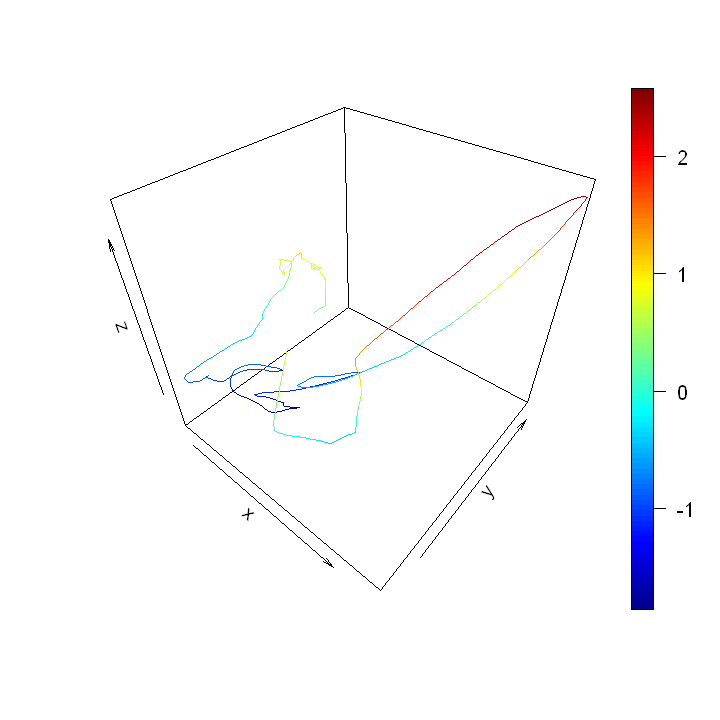

In [79]:
#Class 3 visualization
x3 <- x_tr[4,]
y3 <- y_tr[4,]
z3 <- z_tr[4,]
x3 <- x3[,-1]
y3 <- y3[,-1]
z3 <- z3[,-1]
concat_gest3 <- cbind(t(x3), t(y3), t(z3))
concat_gest3 <- data.frame(concat_gest3)
colnames(concat_gest3) <- c("X","Y","Z")
scatter3D(concat_gest3$X,concat_gest3$Y, concat_gest3$Z, type = "l")

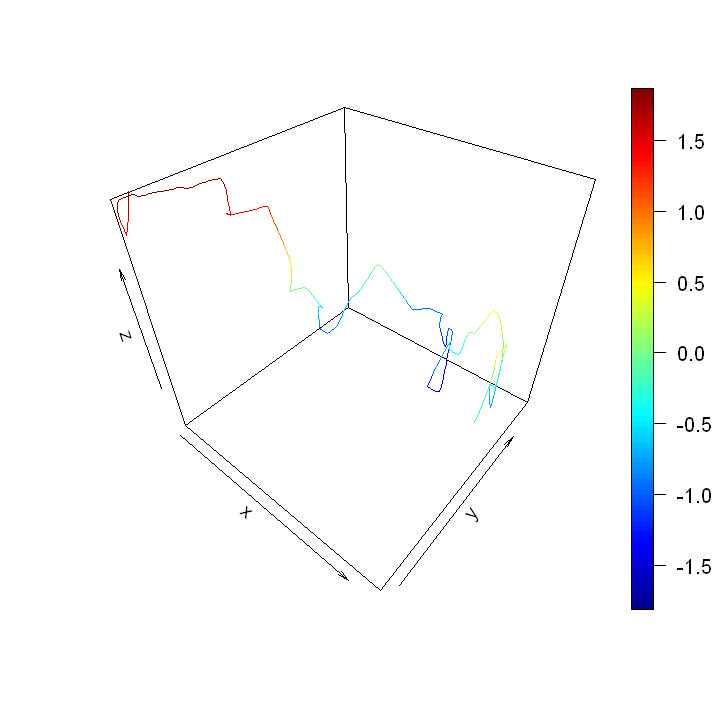

In [80]:
#Class 4 visualization
x4 <- x_tr[5,]
y4 <- y_tr[5,]
z4 <- z_tr[5,]
x4 <- x4[,-1]
y4 <- y4[,-1]
z4 <- z4[,-1]
concat_gest4 <- cbind(t(x4), t(y4), t(z4))
concat_gest4 <- data.frame(concat_gest4)
colnames(concat_gest4) <- c("X","Y","Z")
scatter3D(concat_gest4$X,concat_gest4$Y, concat_gest4$Z, type = "l")

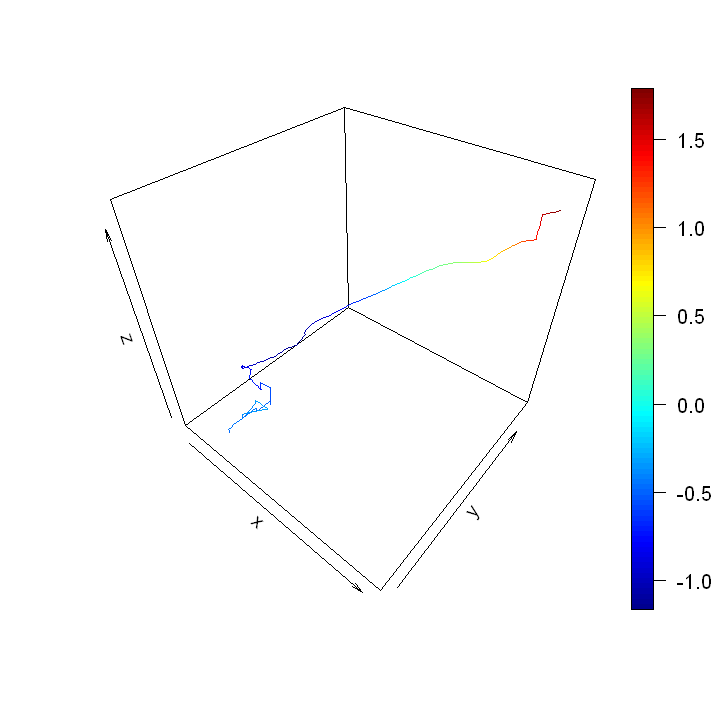

In [81]:
#Class 5 visualization
x5<- x_tr[2,]
y5 <- y_tr[2,]
z5 <- z_tr[2,]
x5 <- x5[,-1]
y5 <- y5[,-1]
z5 <- z5[,-1]
concat_gest5 <- cbind(t(x5), t(y5), t(z5))
concat_gest5 <- data.frame(concat_gest5)
colnames(concat_gest5) <- c("X","Y","Z")
scatter3D(concat_gest5$X,concat_gest5$Y, concat_gest5$Z, type = "l")

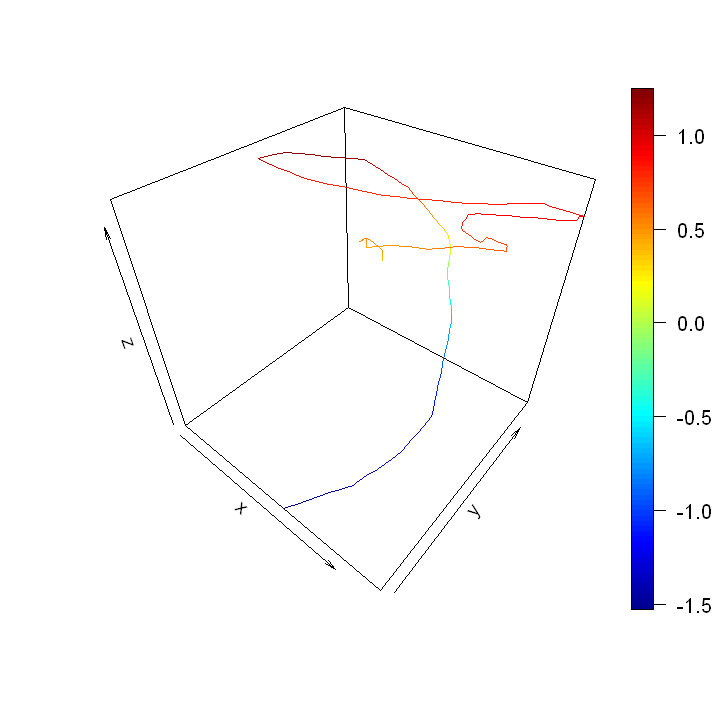

In [83]:
#Class 6 visualization
x6<- x_tr[1,]
y6 <- y_tr[1,]
z6 <- z_tr[1,]
x6 <- x6[,-1]
y6 <- y6[,-1]
z6 <- z6[,-1]
concat_gest6 <- cbind(t(x6), t(y6), t(z6))
concat_gest6 <- data.frame(concat_gest6)
colnames(concat_gest6) <- c("X","Y","Z")
scatter3D(concat_gest6$X,concat_gest6$Y, concat_gest6$Z, type = "l")

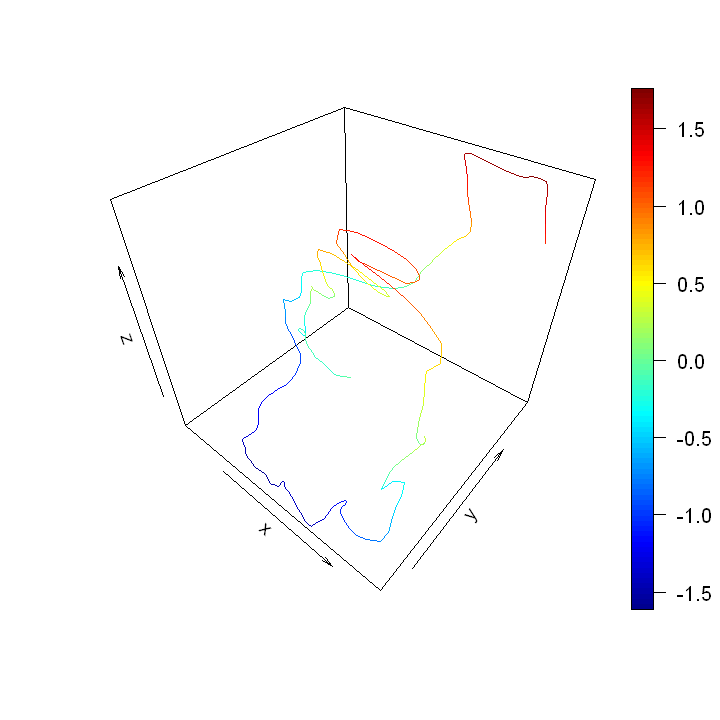

In [84]:
#Class 7 visualization
x7<- x_tr[7,]
y7 <- y_tr[7,]
z7 <- z_tr[7,]
x7 <- x7[,-1]
y7 <- y7[,-1]
z7 <- z7[,-1]
concat_gest7 <- cbind(t(x7), t(y7), t(z7))
concat_gest7 <- data.frame(concat_gest7)
colnames(concat_gest7) <- c("X","Y","Z")
scatter3D(concat_gest7$X,concat_gest7$Y, concat_gest7$Z, type = "l")

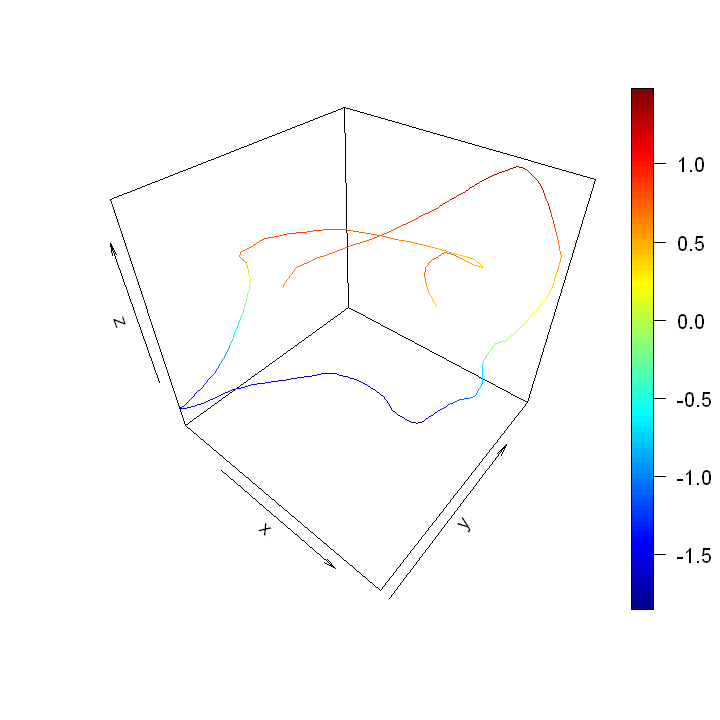

In [85]:
#Class 8 visualization
x8<- x_tr[6,]
y8 <- y_tr[6,]
z8 <- z_tr[6,]
x8 <- x8[,-1]
y8 <- y8[,-1]
z8 <- z8[,-1]
concat_gest8 <- cbind(t(x8), t(y8), t(z8))
concat_gest8 <- data.frame(concat_gest8)
colnames(concat_gest8) <- c("X","Y","Z")
scatter3D(concat_gest8$X,concat_gest8$Y, concat_gest8$Z, type = "l")

b) Assume that X, Y and Z variables are concatenated to obtain a single time series. In other words, the information from
X, Y and Z axis are concatenated to obtain a single series of length 3T (each axis is represented by a time series of length T).
Apply PCA to the time series from each class in the training data. You are expected to filter the data from each class and
apply PCA to the representation. Work on the following questions based on your PCA application for the time series from each
class.
How much variability can be recovered by the first two components?
Draw the each eigenvector (component) as a time series for each class. What do the
eigenvectors imply in this setting? In total, you are expected to provide 8 plots. Each plot is
expected to provide two time series (i.e. first eigenvector and the second eigenvector). Are
there any interesting patterns/observations? If yes, provide your comments.

In [119]:
colNames <- function(letter, length){
    lst <- rep(1,length)
    for(i in 1:length){
        conc <- paste(letter, toString(i),sep="")
        lst[i] <- conc
    }
    return(lst)
}

# X Train
x_tr = read.table("uWaveGestureLibrary_X_TRAIN")
colnames(x_tr)[1] = "class"
xcol <- colNames("xt",dim(x_tr)[2]-1)
colnames(x_tr)[2:316] = xcol


# y Train
y_tr = read.table("uWaveGestureLibrary_y_TRAIN")
y_tr <- y_tr[,-1]
ycol <- colNames("yt",dim(y_tr)[2])
colnames(y_tr) = ycol

# z Train
z_tr = read.table("uWaveGestureLibrary_z_TRAIN")
z_tr <- z_tr[,-1]
zcol <- colNames("zt",dim(z_tr)[2])
colnames(z_tr) = zcol

#Concatanated data frame
conc_df <- cbind(x_tr, y_tr, z_tr)
head(conc_df)


class,xt1,xt2,xt3,xt4,xt5,xt6,xt7,xt8,xt9,...,zt306,zt307,zt308,zt309,zt310,zt311,zt312,zt313,zt314,zt315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [257]:
#data is separated by class
conc_cls1 <- conc_df[conc_df$class == 1,]
conc_cls1 <- t(conc_cls1[,-1])
conc_cls2 <- conc_df[conc_df$class == 2,]
conc_cls2 <- t(conc_cls2[,-1])
conc_cls3 <- conc_df[conc_df$class == 3,]
conc_cls3 <- t(conc_cls3[,-1])
conc_cls4 <- conc_df[conc_df$class == 4,]
conc_cls4 <- t(conc_cls4[,-1])
conc_cls5 <- conc_df[conc_df$class == 5,]
conc_cls5 <- t(conc_cls5[,-1])
conc_cls6 <- conc_df[conc_df$class == 6,]
conc_cls6 <- t(conc_cls6[,-1])
conc_cls7 <- conc_df[conc_df$class == 7,]
conc_cls7 <- t(conc_cls7[,-1])
conc_cls8 <- conc_df[conc_df$class == 8,]
conc_cls8 <- t(conc_cls8[,-1])

Class 1

In [241]:
pca1<-princomp(conc_cls1)
summary(pca1, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2     Comp.3     Comp.4    Comp.5
Standard deviation     8.028211 3.5565697 2.86911896 2.31455777 2.1915407
Proportion of Variance 0.529979 0.1040121 0.06768901 0.04405114 0.0394930
Cumulative Proportion  0.529979 0.6339911 0.70168010 0.74573124 0.7852242
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     1.98826167 1.87441483 1.56756230 1.39707750 1.2847240
Proportion of Variance 0.03250635 0.02889033 0.02020555 0.01604952 0.0135719
Cumulative Proportion  0.81773059 0.84662092 0.86682647 0.88287599 0.8964479
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     1.15339000 1.045017038 0.996198946 0.976517050
Proportion of Variance 0.01093889 0.008979824 0.008160434 0.007841168
Cumulative Proportion  0.90738679 0.916366611 0.924527045 0.932368212
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard deviation 

63% of the variability is recevored from the first two component.

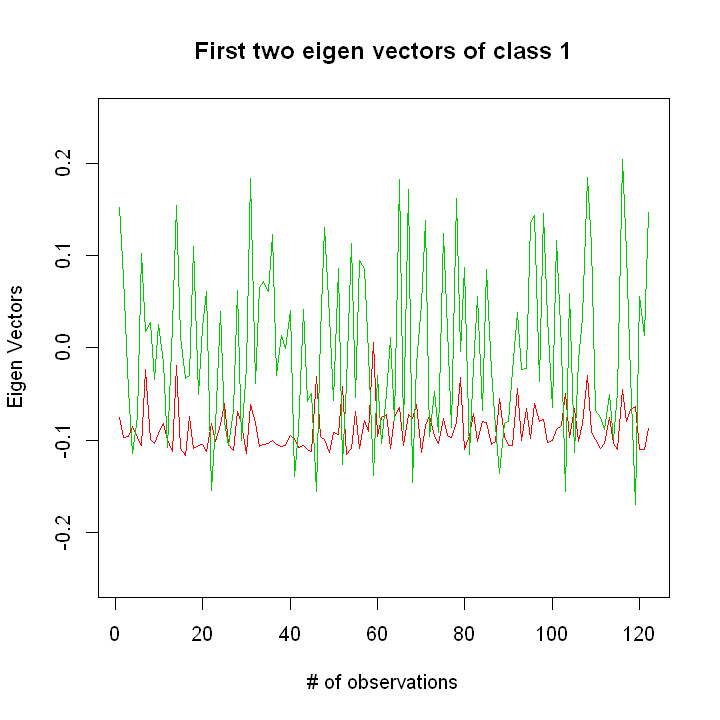

In [242]:
vec1_1 <- eigen(cov(conc_cls1))$vectors[,1]
vec1_2 <- eigen(cov(conc_cls1))$vectors[,2]
plot(1:length(vec1_1),vec1_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 1", ylim = c(-0.25,0.25))
lines(1:length(vec1_2),vec1_2, type = "l", col = 3)

Class 2

In [243]:
pca2<-princomp(conc_cls2)
summary(pca2, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     7.5331833 4.0838269 2.26849428 1.7788152 1.63084416
Proportion of Variance 0.5271257 0.1549144 0.04780051 0.0293913 0.02470484
Cumulative Proportion  0.5271257 0.6820401 0.72984065 0.7592320 0.78393680
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.60841441 1.49026057 1.25988202 1.17029824 1.15775578
Proportion of Variance 0.02402996 0.02062916 0.01474405 0.01272185 0.01245062
Cumulative Proportion  0.80796676 0.82859592 0.84333997 0.85606182 0.86851244
                          Comp.11    Comp.12     Comp.13     Comp.14
Standard deviation     1.08128602 1.05031681 1.011991974 0.915268448
Proportion of Variance 0.01086021 0.01024702 0.009512864 0.007781335
Cumulative Proportion  0.87937266 0.88961968 0.899132545 0.906913880
                           Comp.15    Comp.16     Comp.17     Comp.18
Standard deviati

68% of the variability is recevored from the first two component.

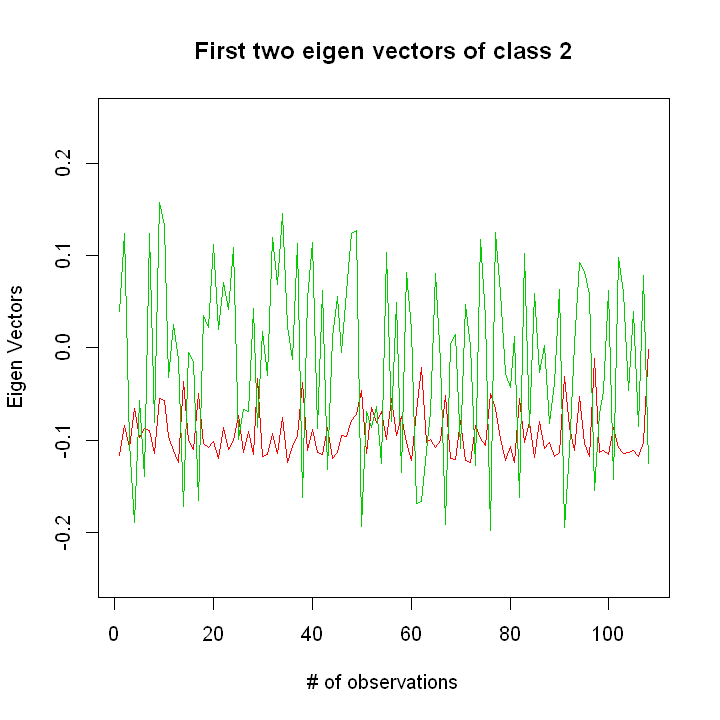

In [244]:
vec2_1 <- eigen(cov(conc_cls2))$vectors[,1]
vec2_2 <- eigen(cov(conc_cls2))$vectors[,2]
plot(1:length(vec2_1),vec2_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 2", ylim = c(-0.25,0.25))
lines(1:length(vec2_2),vec2_2, type = "l", col = 3)

Class 3

In [245]:
pca3<-princomp(conc_cls3)
summary(pca3, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     6.5926080 4.4043071 2.62184247 2.3558363 2.21094016
Proportion of Variance 0.4113292 0.1835821 0.06505613 0.0525249 0.04626249
Cumulative Proportion  0.4113292 0.5949113 0.65996740 0.7124923 0.75875479
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     2.00882814 1.90011126 1.56061179 1.34085990 1.20777658
Proportion of Variance 0.03819096 0.03416907 0.02304968 0.01701539 0.01380538
Cumulative Proportion  0.79694576 0.83111482 0.85416450 0.87117988 0.88498526
                          Comp.11    Comp.12     Comp.13     Comp.14
Standard deviation     1.13887140 1.07578358 0.937221339 0.909045797
Proportion of Variance 0.01227508 0.01095279 0.008313031 0.007820717
Cumulative Proportion  0.89726034 0.90821313 0.916526165 0.924346882
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard deviat

59% of the variability is recevored from the first two component.

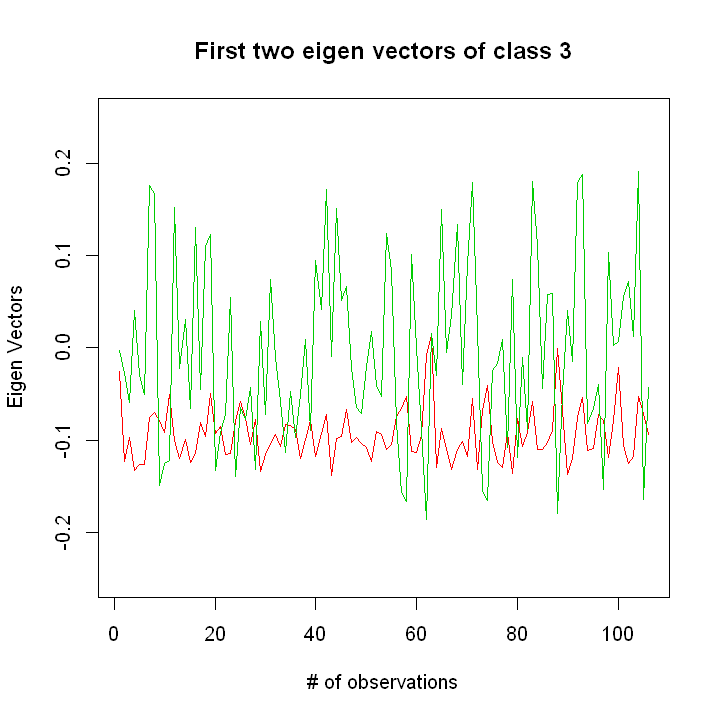

In [246]:
vec3_1 <- eigen(cov(conc_cls3))$vectors[,1]
vec3_2 <- eigen(cov(conc_cls3))$vectors[,2]
plot(1:length(vec3_1),vec3_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 3", ylim = c(-0.25,0.25))
lines(1:length(vec3_2),vec3_2, type = "l", col = 3)

Class 4

In [204]:
pca4<-princomp(conc_cls4)
summary(pca4, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     6.735375 3.8009743 3.4125880 2.44965349 2.40369813
Proportion of Variance 0.413725 0.1317583 0.1062077 0.05472648 0.05269241
Cumulative Proportion  0.413725 0.5454833 0.6516910 0.70641749 0.75910991
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     2.18735997 1.87177022 1.47833621 1.30782170 1.2385004
Proportion of Variance 0.04363437 0.03195165 0.01993126 0.01559859 0.0139888
Cumulative Proportion  0.80274428 0.83469593 0.85462718 0.87022577 0.8842146
                          Comp.11   Comp.12     Comp.13     Comp.14     Comp.15
Standard deviation     1.12201512 1.0630022 1.026304188 0.945319616 0.865822149
Proportion of Variance 0.01148116 0.0103052 0.009605952 0.008149774 0.006836686
Cumulative Proportion  0.89569573 0.9060009 0.915606885 0.923756659 0.930593345
                           Comp.16     Comp.17    

54% of the variability is recevored from the first two component.

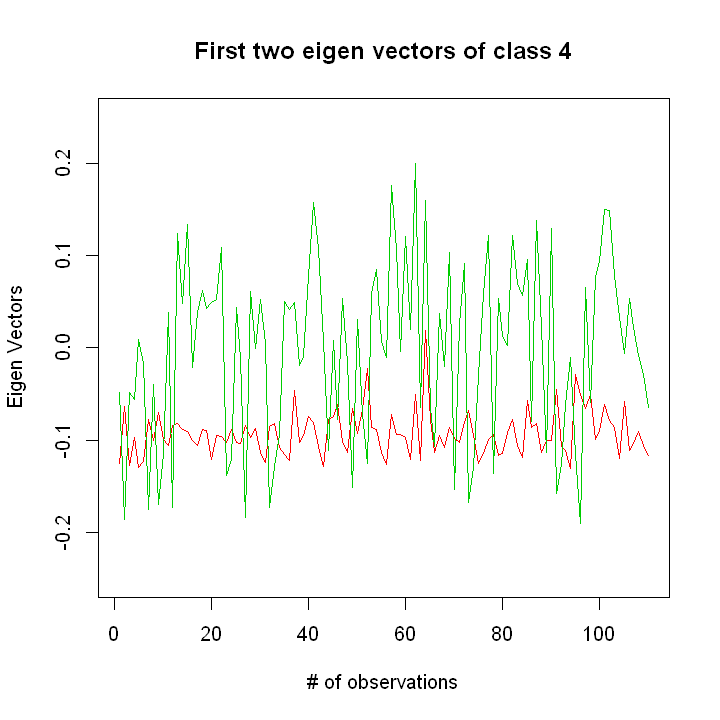

In [205]:
vec4_1 <- eigen(cov(conc_cls4))$vectors[,1]
vec4_2 <- eigen(cov(conc_cls4))$vectors[,2]
plot(1:length(vec4_1),vec4_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 4", ylim = c(-0.25,0.25))
lines(1:length(vec4_2),vec4_2, type = "l", col = 3)

Class 5

In [229]:
pca5<-princomp(conc_cls5)
summary(pca5, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     8.1626844 4.0131468 3.7424189 2.11523942 1.99158544
Proportion of Variance 0.5263119 0.1272176 0.1106323 0.03534242 0.03133106
Cumulative Proportion  0.5263119 0.6535295 0.7641618 0.79950426 0.83083532
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     1.75417407 1.59258807 1.33812193 1.23631045 1.1592838
Proportion of Variance 0.02430651 0.02003476 0.01414388 0.01207347 0.0106159
Cumulative Proportion  0.85514183 0.87517659 0.88932047 0.90139394 0.9120098
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     1.105228451 1.056260997 0.996036948 0.970270126
Proportion of Variance 0.009648978 0.008812917 0.007836607 0.007436396
Cumulative Proportion  0.921658816 0.930471733 0.938308340 0.945744736
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard de

65% of the variability is recevored from the first two component.

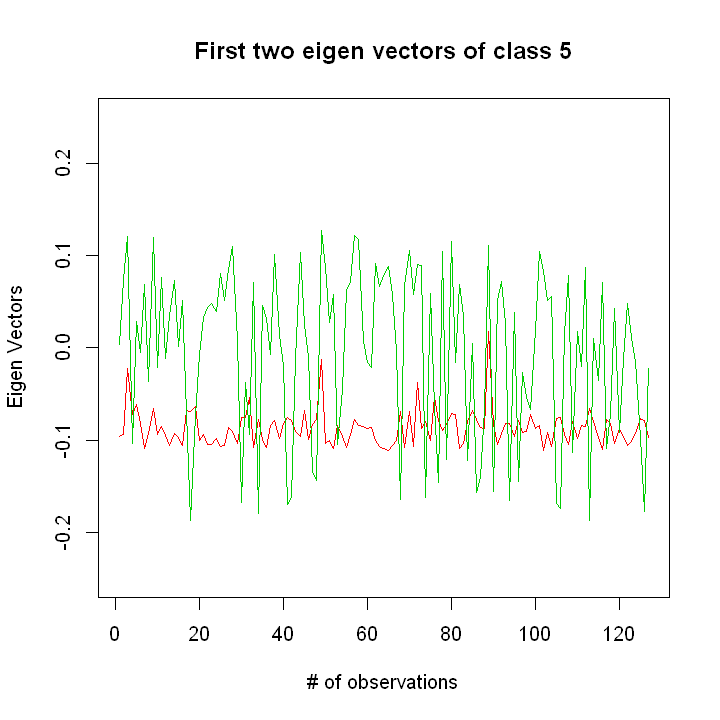

In [230]:
vec5_1 <- eigen(cov(conc_cls5))$vectors[,1]
vec5_2 <- eigen(cov(conc_cls5))$vectors[,2]
plot(1:length(vec5_1),vec5_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 5", ylim = c(-0.25,0.25))
lines(1:length(vec5_2),vec5_2, type = "l", col = 3)

Class 6

In [231]:
pca6<-princomp(conc_cls6)
summary(pca6, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     6.843589 3.5936333 3.3886574 2.34520745 2.20512103
Proportion of Variance 0.423278 0.1167147 0.1037799 0.04970733 0.04394635
Cumulative Proportion  0.423278 0.5399927 0.6437726 0.69347991 0.73742626
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.83171837 1.73654425 1.70488366 1.54489987 1.32793116
Proportion of Variance 0.03032322 0.02725396 0.02626923 0.02157042 0.01593709
Cumulative Proportion  0.76774948 0.79500344 0.82127267 0.84284309 0.85878019
                          Comp.11    Comp.12    Comp.13    Comp.14     Comp.15
Standard deviation     1.25455076 1.17240120 1.16429513 1.03196044 1.020044680
Proportion of Variance 0.01422441 0.01242254 0.01225135 0.00962463 0.009403647
Cumulative Proportion  0.87300460 0.88542714 0.89767849 0.90730312 0.916706771
                           Comp.16     Comp.17    

53% of the variability is recevored from the first two component.

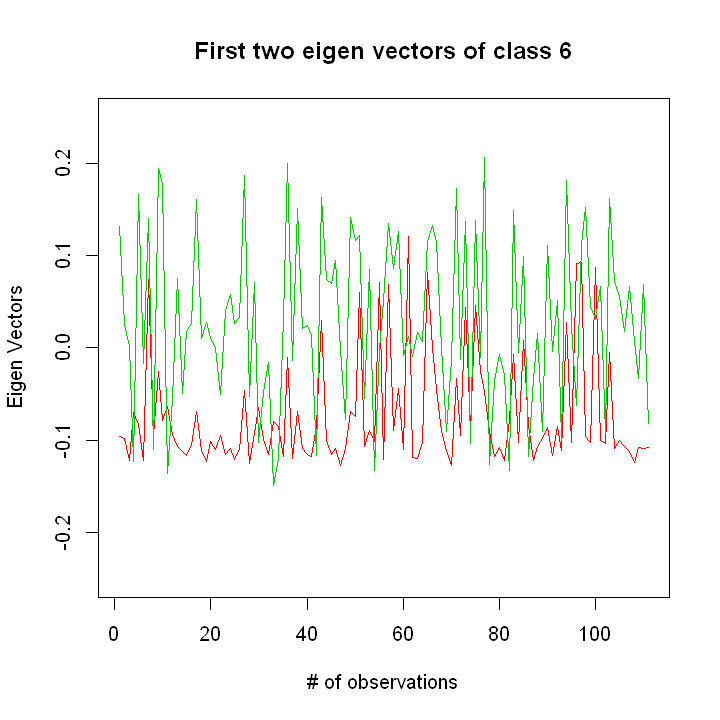

In [232]:
vec6_1 <- eigen(cov(conc_cls6))$vectors[,1]
vec6_2 <- eigen(cov(conc_cls6))$vectors[,2]
plot(1:length(vec6_1),vec6_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 6", ylim = c(-0.25,0.25))
lines(1:length(vec6_2),vec6_2, type = "l", col = 3)

Class 7

In [260]:
pca7 <- princomp(conc_cls7)
summary(pca7, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     7.449361 4.2765886 3.01663241 2.53877839 1.80361180
Proportion of Variance 0.497051 0.1638166 0.08150939 0.05773145 0.02913728
Cumulative Proportion  0.497051 0.6608676 0.74237696 0.80010841 0.82924569
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.54421748 1.41534745 1.29682946 1.20853375 1.13869859
Proportion of Variance 0.02135895 0.01794275 0.01506359 0.01308219 0.01161396
Cumulative Proportion  0.85060463 0.86854738 0.88361098 0.89669317 0.90830713
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.992094316 0.906044084 0.856664067 0.781408948
Proportion of Variance 0.008815944 0.007352949 0.006573308 0.005469148
Cumulative Proportion  0.917123074 0.924476023 0.931049331 0.936518479
                           Comp.15    Comp.16    Comp.17     Comp.18
Standard 

66% of the variability is recevored from the first two component.

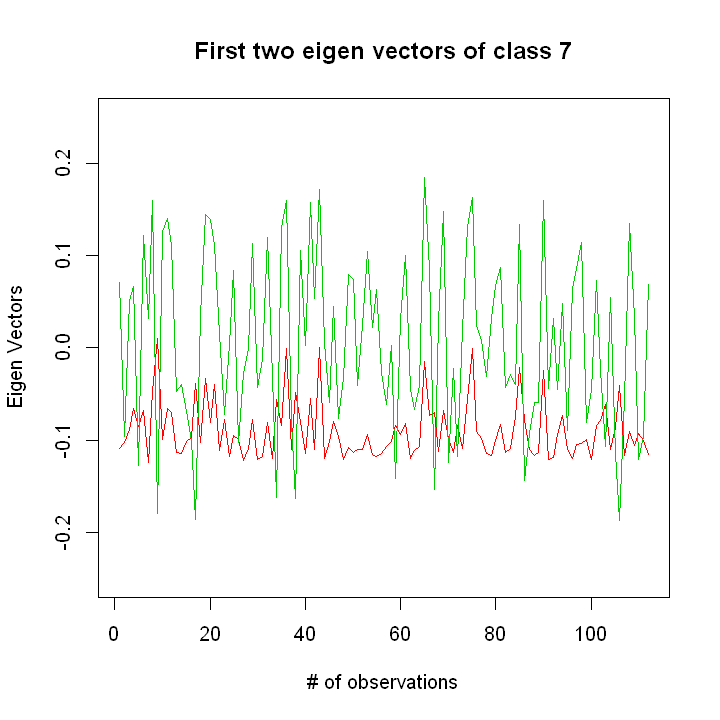

In [261]:
vec7_1 <- eigen(cov(conc_cls7))$vectors[,1]
vec7_2 <- eigen(cov(conc_cls7))$vectors[,2]
plot(1:length(vec7_1),vec7_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 7", ylim = c(-0.25,0.25))
lines(1:length(vec7_2),vec7_2, type = "l", col = 3)

Class 8

In [262]:
pca8 <- princomp(conc_cls8)
summary(pca8, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4    Comp.5
Standard deviation     6.8986625 5.1569455 2.23251483 1.98923747 1.5751378
Proportion of Variance 0.4774311 0.2667878 0.04999995 0.03969668 0.0248896
Cumulative Proportion  0.4774311 0.7442189 0.79421887 0.83391555 0.8588052
                           Comp.6    Comp.7     Comp.8    Comp.9     Comp.10
Standard deviation     1.40548075 1.3080790 1.07651563 1.0520765 0.908445944
Proportion of Variance 0.01981667 0.0171652 0.01162577 0.0111039 0.008279023
Cumulative Proportion  0.87862182 0.8957870 0.90741279 0.9185167 0.926795714
                           Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.858923083 0.802834014 0.749959499 0.693562940
Proportion of Variance 0.007400984 0.006465951 0.005642305 0.004825615
Cumulative Proportion  0.934196698 0.940662649 0.946304954 0.951130568
                           Comp.15     Comp.16     Comp.17     Comp.18
Standard de

74% of the variability is recevored from the first two component.

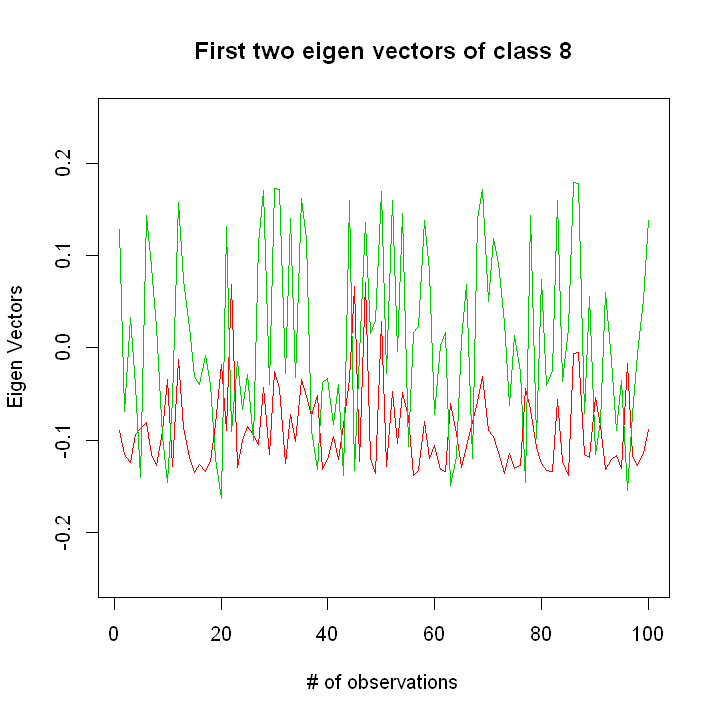

In [263]:
vec8_1 <- eigen(cov(conc_cls8))$vectors[,1]
vec8_2 <- eigen(cov(conc_cls8))$vectors[,2]
plot(1:length(vec8_1),vec8_1, type = "l", col = 2, xlab = "# of observations", ylab = "Eigen Vectors",
    main = "First two eigen vectors of class 8", ylim = c(-0.25,0.25))
lines(1:length(vec8_2),vec8_2, type = "l", col = 3)

Values of the eigen vector of the first principle component seems closer to each other than values of the eigen vector of
the second principle component.